In [1]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.dataLoaders.DataLoader import DataSetLoader
importlib.reload(sys.modules['src.dataLoaders.DataLoader'])

# 10.000 images, minSize=8, maxSize=20
dataset = 'EnhancedNoisyImageGeneratorRandNoiseShape'
data_dir = '../datasets/artificial_data/'

data_loader = DataSetLoader(data_dir=f'{data_dir}{dataset}')
data_loader.load_data()

In [4]:
from src.models.baseModels.resnet_regression import ResNetModel
importlib.reload(sys.modules['src.models.baseModels.resnet_regression'])

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <E03EDA44-89AE-3115-9796-62BA9E0E2EDE> /Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <D2077E4D-18BC-34B9-8A9B-1EF634A0F416> /Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


<module 'src.models.baseModels.resnet_regression' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/models/baseModels/resnet_regression.py'>

In [76]:
resnet = ResNetModel(
    data_dir=f'{data_dir}{dataset}', 
    num_epochs=60,
    learning_rate=0.01,
    weight_decay=1e-4,
    early_stopping_tol=30,
    early_stopping_min_delta=30,
    dataLoader=data_loader,
    depth=18,   
) 

# resnet.load_data()
resnet.train()
resnet.evaluate()

Is cuda available:  False
Is mps available:  True
Epoch 1/60, Train Loss: 1589996088198901.2, Val Loss: 3181838476071040.0
Epoch 2/60, Train Loss: 665838576.8721924, Val Loss: 1332892644.40625
Epoch 3/60, Train Loss: 232326802.67993164, Val Loss: 8066237279.0
Epoch 4/60, Train Loss: 127035535.79626465, Val Loss: 254644398.65625
Epoch 5/60, Train Loss: 35399.26644897461, Val Loss: 72444.50573730469
Epoch 6/60, Train Loss: 12603.855041503906, Val Loss: 25214.82186126709
Epoch 7/60, Train Loss: 3081.7117919921875, Val Loss: 6217.221923828125
Epoch 8/60, Train Loss: 6467.271347045898, Val Loss: 13191.760437011719
Epoch 9/60, Train Loss: 2699.148712158203, Val Loss: 5107.131103515625
Epoch 10/60, Train Loss: 925.4055480957031, Val Loss: 1012.0022277832031
Epoch 11/60, Train Loss: 1129.311264038086, Val Loss: 6452.982116699219
Epoch 12/60, Train Loss: 7989.292098999023, Val Loss: 15775.033630371094
Epoch 13/60, Train Loss: 716.9597778320312, Val Loss: 586.8781051635742
Epoch 14/60, Train Los

In [103]:
from src.XAI.GradCam import GradCamResnet
from src.XAI.VanillaSaliency import VanillaSaliency
from src.XAI.GradCamPlusPlus import GradCamPlusPlus
from src.XAI.GuideGradCam import GuidedGradCam
from src.XAI.DeepShap import DeepShapResnet
from src.XAI.utils.BaseXAI import BaseXAI


importlib.reload(sys.modules['src.XAI.utils.SaveFiles'])
importlib.reload(sys.modules['src.XAI.utils.BaseXAI'])

importlib.reload(sys.modules['src.XAI.VanillaSaliency'])
importlib.reload(sys.modules['src.XAI.GradCam'])
importlib.reload(sys.modules['src.XAI.GradCamPlusPlus'])
importlib.reload(sys.modules['src.XAI.GuideGradCam'])
importlib.reload(sys.modules['src.XAI.DeepShap'])

<module 'src.XAI.DeepShap' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/XAI/DeepShap.py'>

In [105]:
vanilla_saliency = VanillaSaliency(resnet)
grad_cam = GradCamResnet(resnet)
grad_cam_plus_plus = GradCamPlusPlus(resnet)
guided_grad_cam = GuidedGradCam(vanilla_saliency=vanilla_saliency, grad_cam=grad_cam)
deep_shap = DeepShapResnet(resnet)

allModels: list[BaseXAI] = [vanilla_saliency, grad_cam, grad_cam_plus_plus, guided_grad_cam, deep_shap]

Image 1


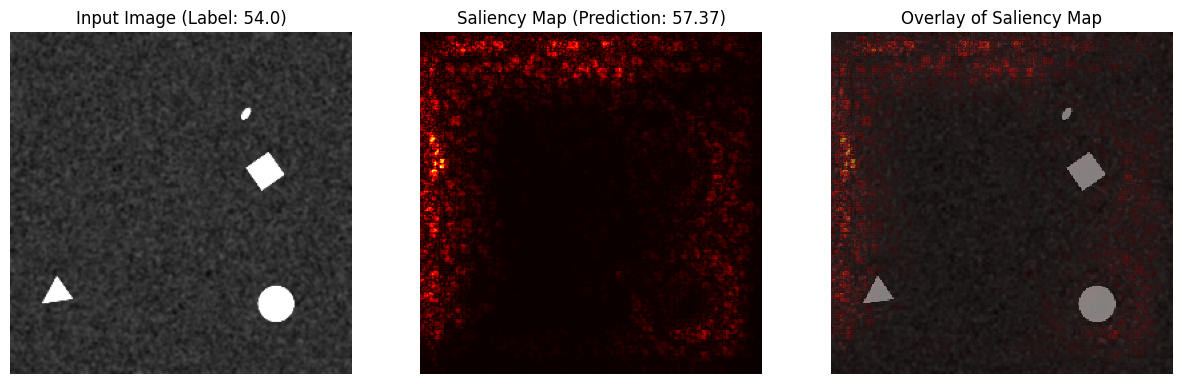

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/nn/modules/module.py:1368: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


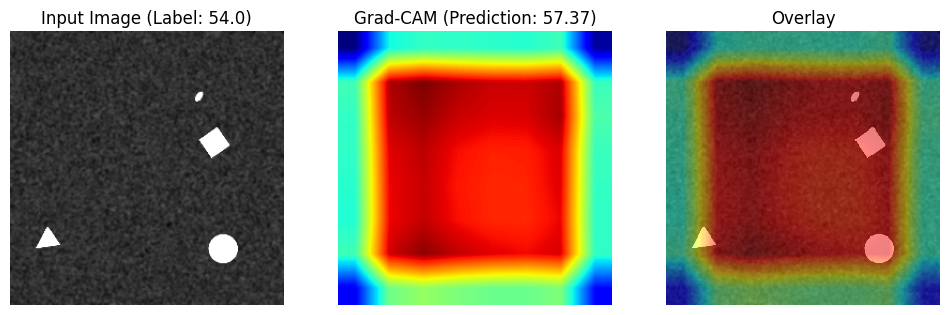

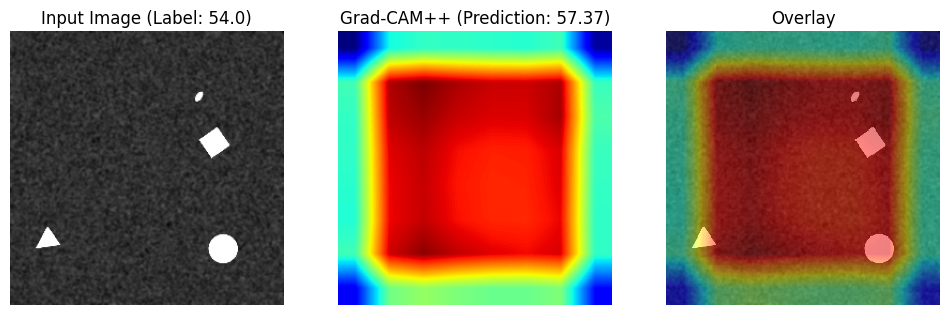

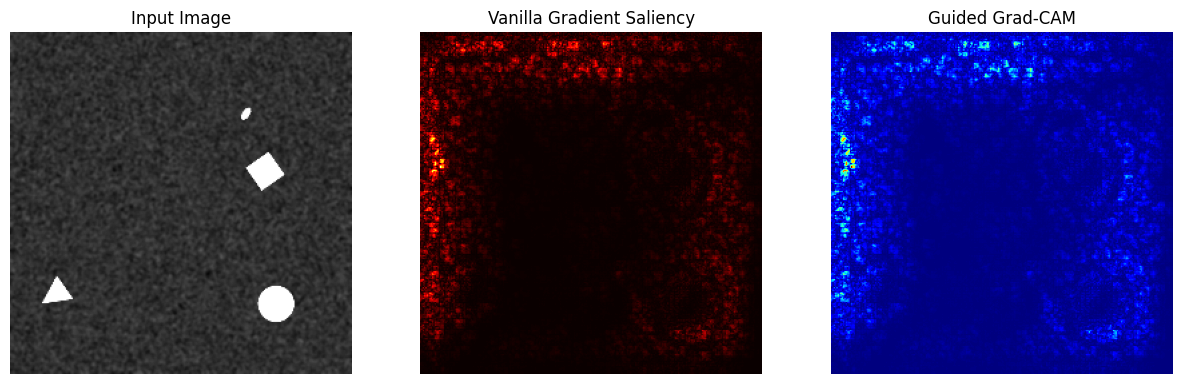

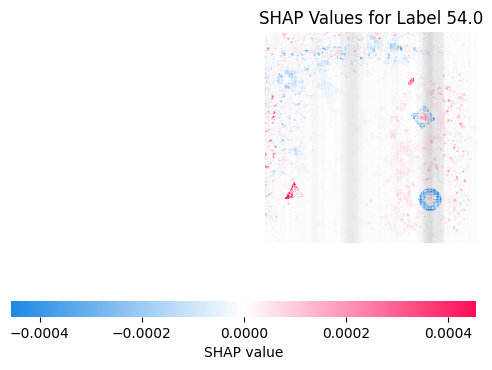

Image 2


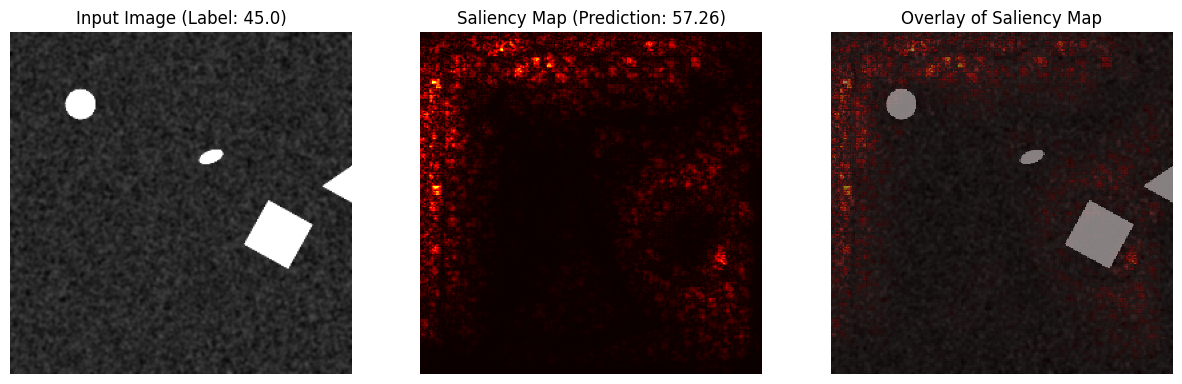

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/nn/modules/module.py:1368: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


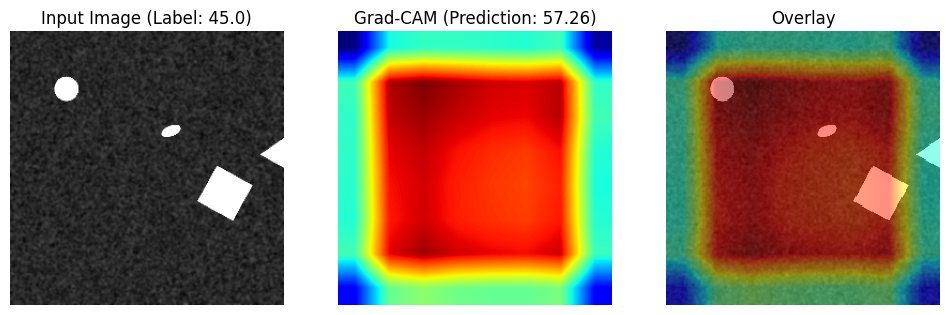

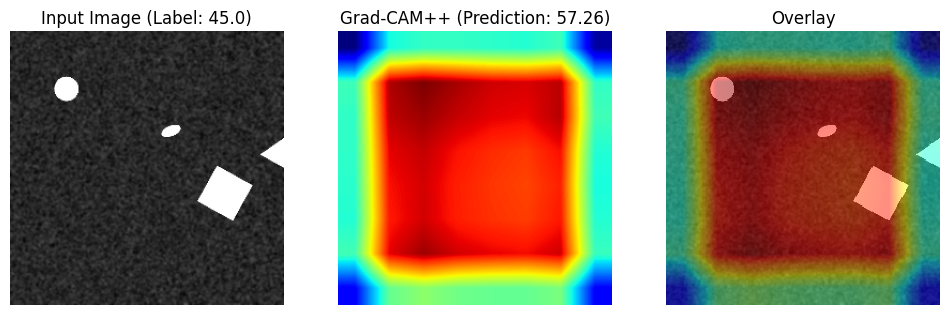

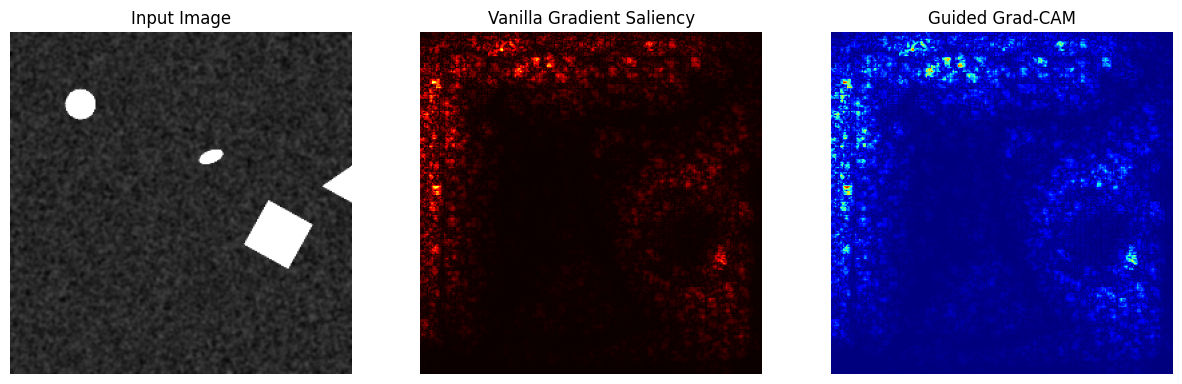

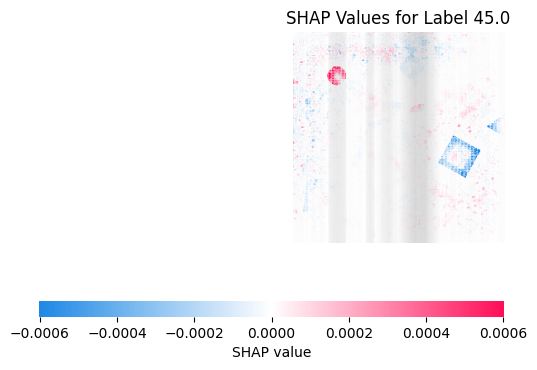

Image 3


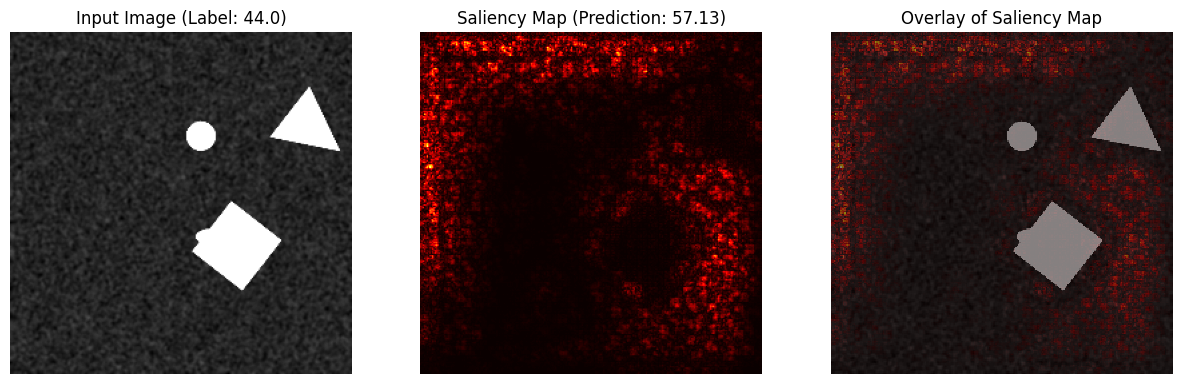

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/nn/modules/module.py:1368: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


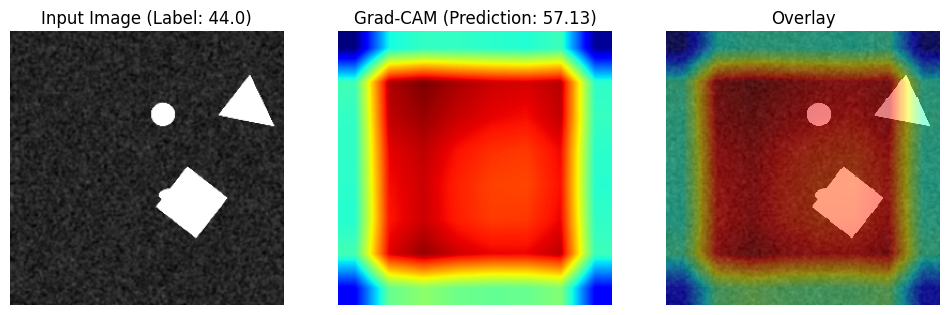

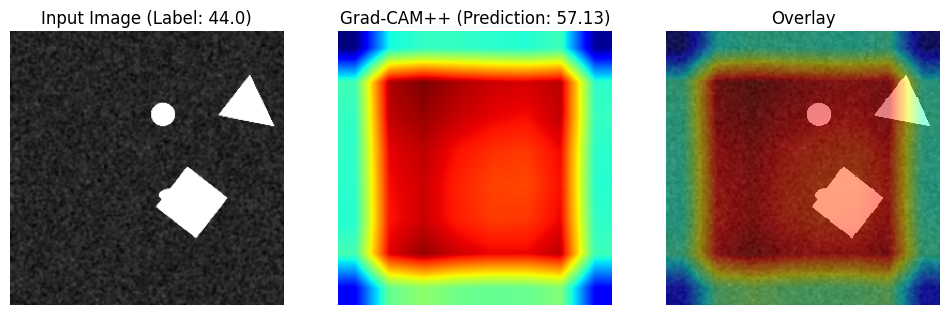

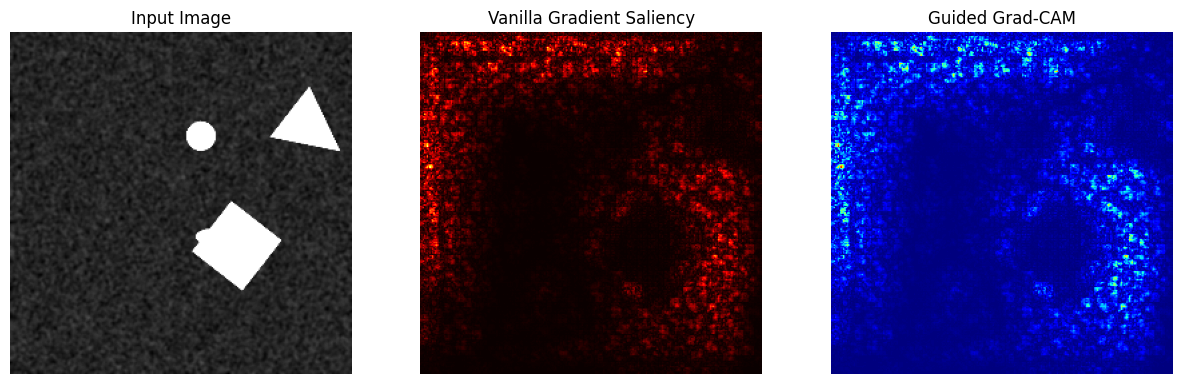

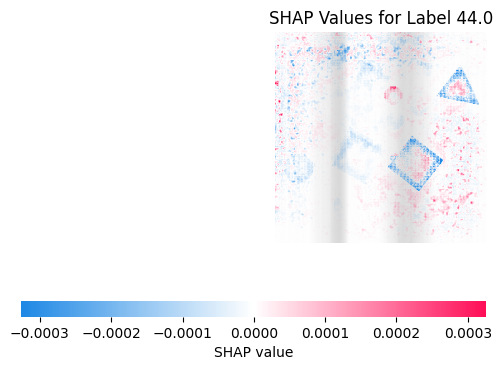

Image 4


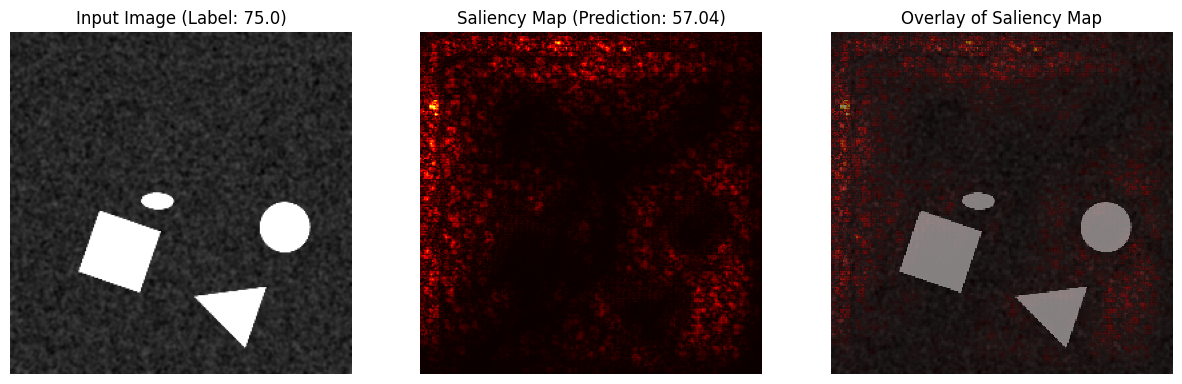

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/nn/modules/module.py:1368: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


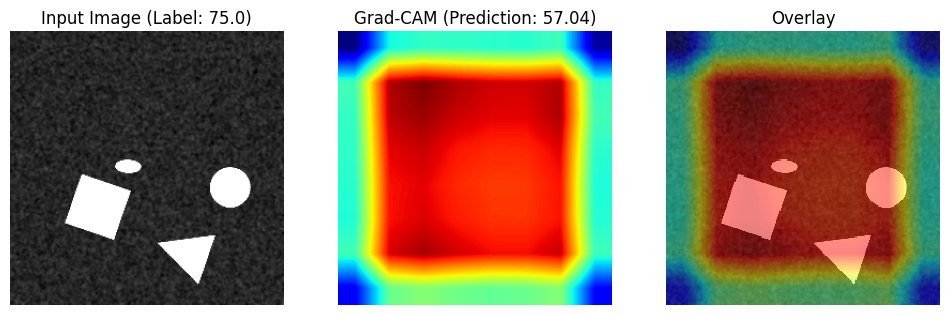

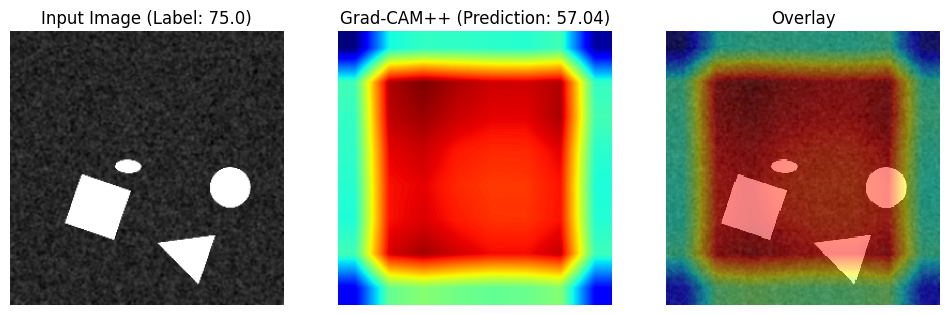

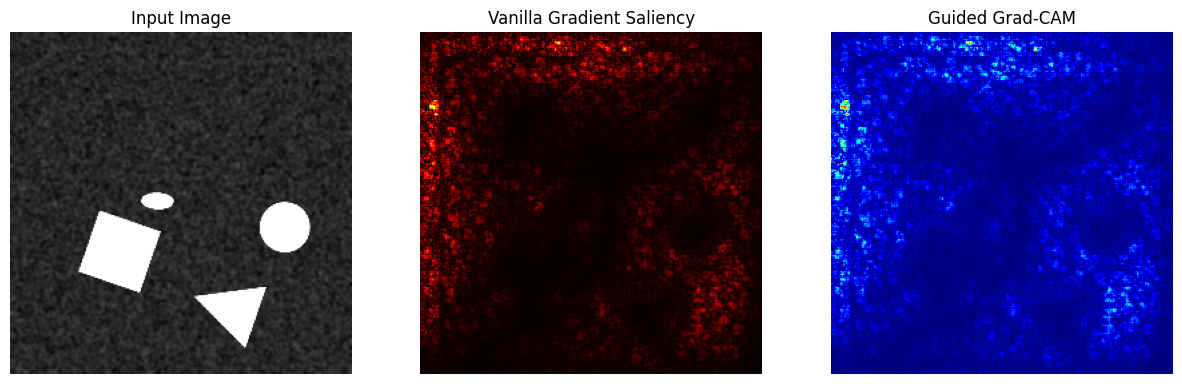

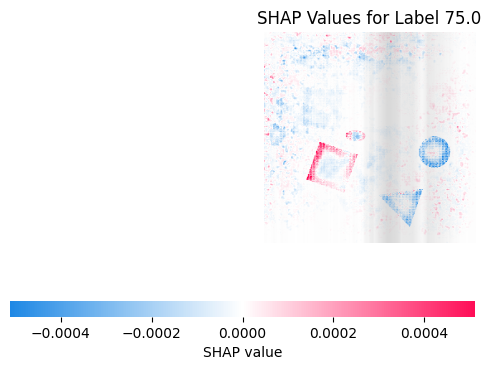

Image 5


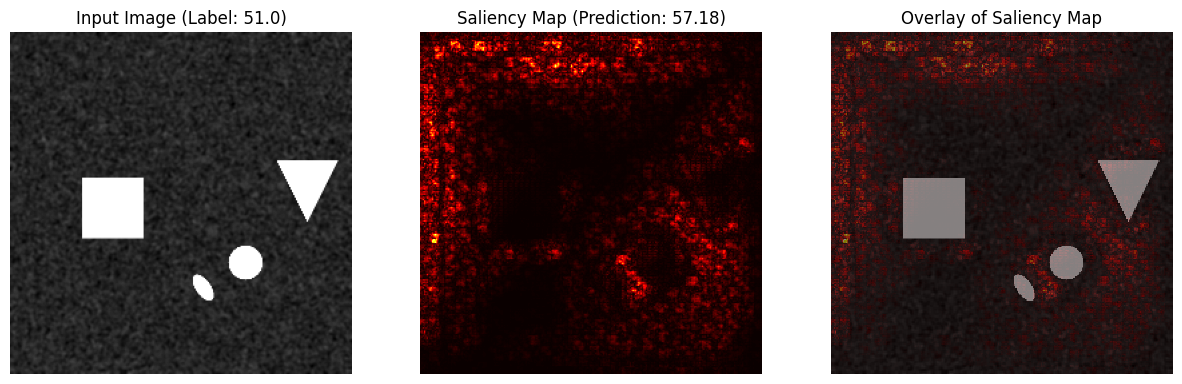

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/nn/modules/module.py:1368: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


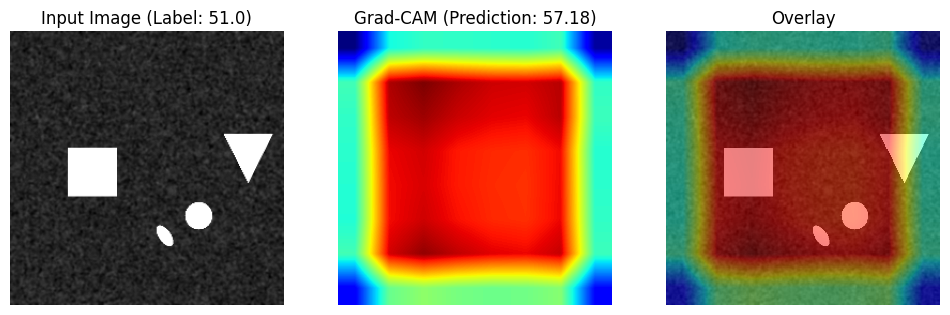

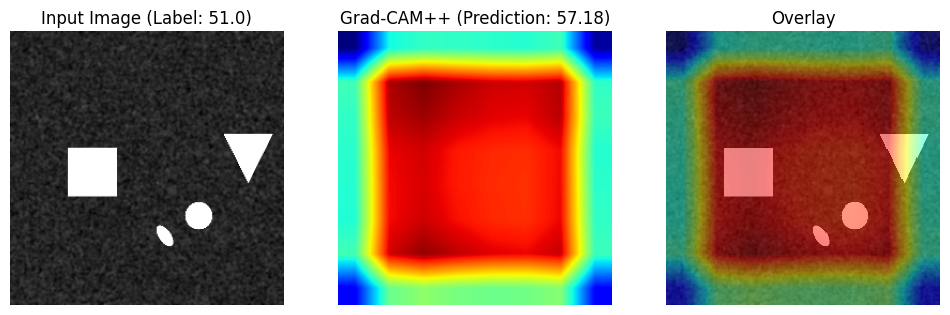

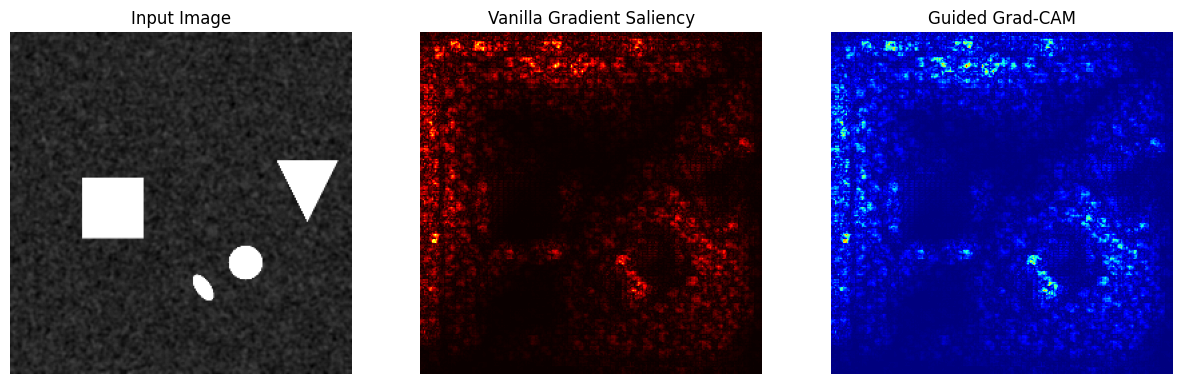

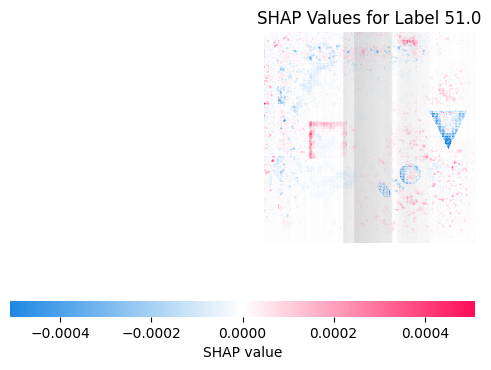

In [106]:
for i in range(5):
    for model in allModels:
        model.generate_map(i)

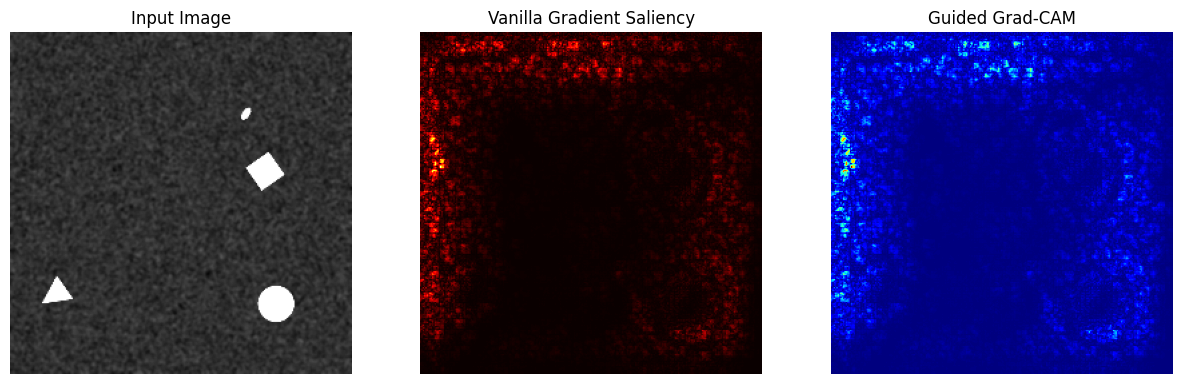

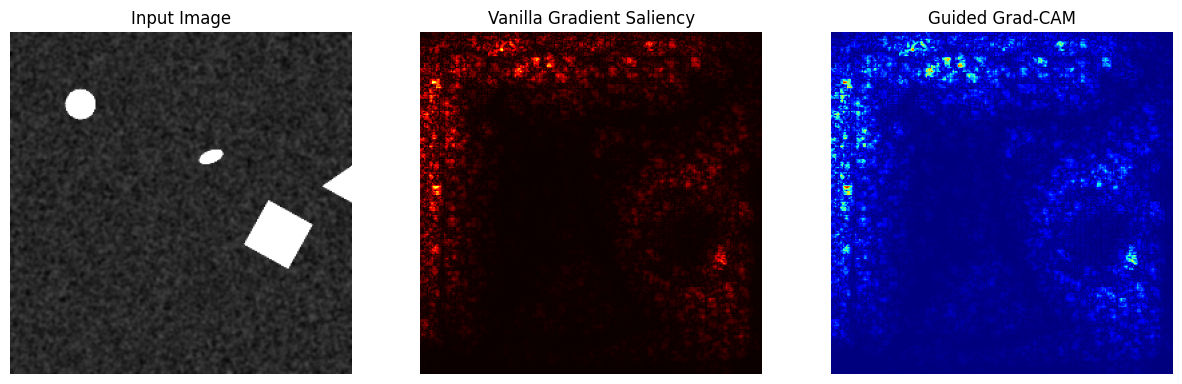

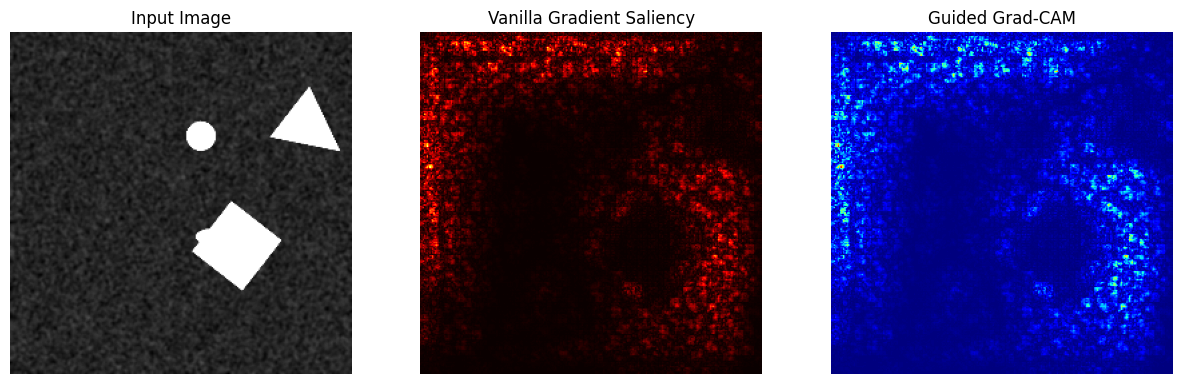

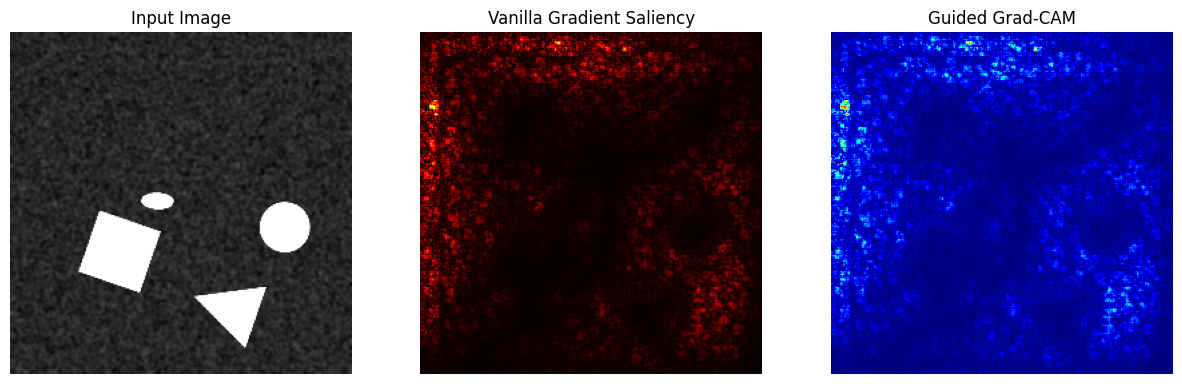

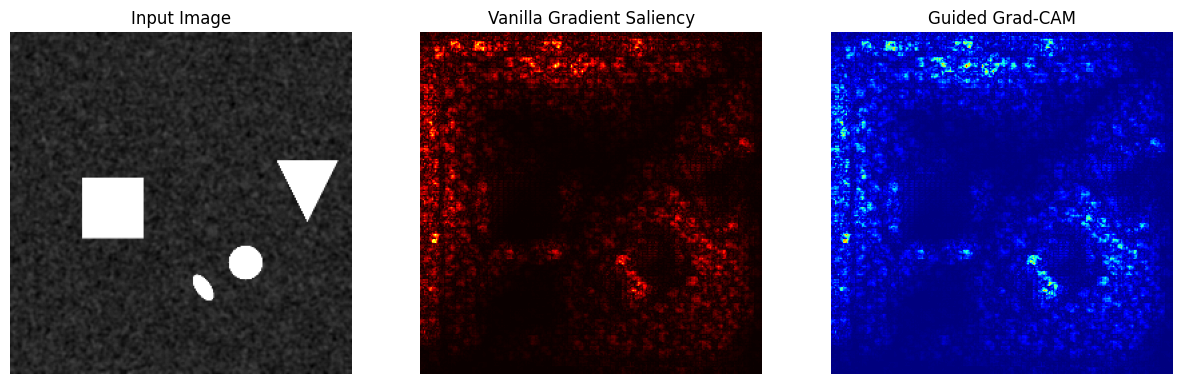

In [101]:
# display guided grad cam
for i in range(5):
    guided_grad_cam.generate_map(i)